



## Data Mining Assignment

Contributors: 

Our group members have been incorrectly assigned to different group then what was originally given in the xls. 

Name's

1. PONMUTHUKUMAR B

2. MUGUNDHAN K

3. DEEPAK G

4. Seetharaman V

5. Jayakrishnan R


Please note that everyone has contributed equally to each phase , but the above table is just for indication.


### Index

1.	<a href="#ProblemStatement">Problem statement</a>
2.	<a href="#DataAnalysis">Exploratory Data Analysis and Statistical Analysis</a>
3.	<a href="#PreprocessData"> Preprocess the data </a>
4.	<a href="#trainModel">Select Training data, test data </a>
5.	<a href="#trainModel">Train the model </a>
6.	<a href="#testModel">Test the model (Predictions and reporting)</a>
7.	<a href="#evaluateModel">Evaluate the model performance</a>
8.	<a href="#improveModel">Suggest ways of improving the model</a>







<a name="ProblemStatement"></a>

## Problem Statement

A bank wants to have a model that helps to predict   whether a client will subscribe for a term deposit or not, based on the relevant data available with the bank. 

As a data scientist, you are required to construct a classification model based on the available data and evaluate its efficacy. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; investigating the relationships in the data set with visualization; creating a model; evaluating the performance of the classification model.

Using the Bank’s Dataset, construct a decision tree-based model, and use the model to predict whether a client will subscribe for a term deposit or not.


<a name="DataAnalysis"></a>

## Exploratory Data Analysis and Statistical Analysis

Here we will be loading the given data-set into data frame and proceed with data analysis

In [91]:
import os
import numpy as np
import pandas as pd

#Visualizations
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [3]:
df = pd.read_excel('bankData.xlsx', sheet_name='Data', header=0)

In [4]:
df.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [5]:
df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

Lets rename the columns and remove those special characters so that its easy to work with

In [7]:
df.rename(columns={'marital status ':'marital status','credit default?':'credit default','housing loan?':'housing loan',
                     'Personal loan':'personal loan' },inplace=True)

In [8]:
df.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

In [9]:
df.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


Now lets find the missing data in our data set

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1019 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1019 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


In [11]:
df.describe()

,age
count,1021.000000
mean,41.066601
std,10.400013
min,19.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,84.000000


In [12]:
df.isnull().values.any()

True

Finding the null values in the dataset

In [13]:
df.isnull().sum()

age               0
job               2
marital status    1
education         1
credit default    1
housing loan      2
personal loan     2
y                 0
dtype: int64

Finding the total count of null values in the data set ( so there were 9 in total )

In [14]:
df.isnull().sum().sum()

9

Lets generate the heatmap to visualize where the null values exist across data set

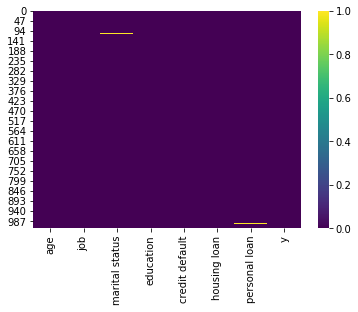

In [19]:
sns.heatmap(df.isnull(),  cmap='viridis', fmt='g')


<a name="PreprocessData"></a>

## Preprocessing the data 

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

In [27]:

for col in df.columns:
    df[col].replace('unknown', np.nan, inplace=True)
    df[col].replace('xxxyy', np.nan, inplace=True)
    
education_count = df['education'].value_counts()
job_count = df['job'].value_counts()
house_loan_count = df['housing loan'].value_counts()

print("Job attribute :\n{0}".format(job_count))
print("--"*40)
print("Education attribute :\n{0}".format(education_count))
print("--"*40)
print("House loan attribute :\n{0}".format(house_loan_count))



Job attribute :
blue-collar      217
management       212
technician       178
admin.           107
services          93
self-employed     52
retired           46
entrepreneur      32
unemployed        29
student           23
housemaid         20
Name: job, dtype: int64
--------------------------------------------------------------------------------
Education attribute :
secondary    524
tertiary     303
primary      151
Name: education, dtype: int64
--------------------------------------------------------------------------------
House loan attribute :
yes    583
no     435
Name: housing loan, dtype: int64


In [50]:
# Missing columns list has a column names that have empty cell
missing_cols = [col for col in df if df[col].isnull().any()]
# Simple imputer object with replacement strategy as most frequent data
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

sanitized_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
sanitized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null object
job               1021 non-null object
marital status    1021 non-null object
education         1021 non-null object
credit default    1021 non-null object
housing loan      1021 non-null object
personal loan     1021 non-null object
y                 1021 non-null object
dtypes: object(8)
memory usage: 63.9+ KB


In [29]:
df.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

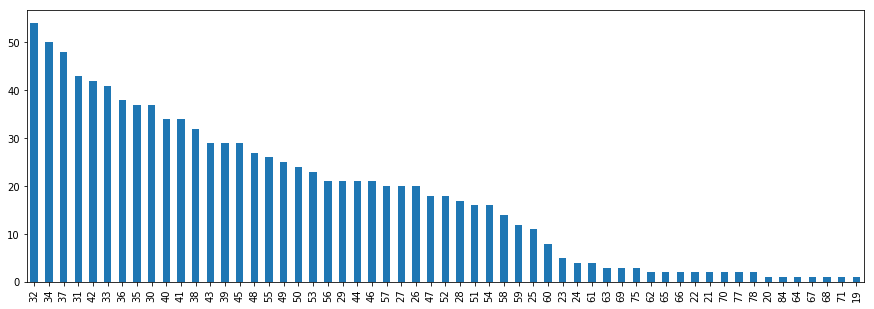

In [30]:
df['age'].value_counts().plot(kind='bar',figsize=(15,5))

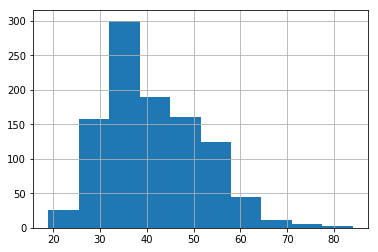

In [31]:
df['age'].hist()

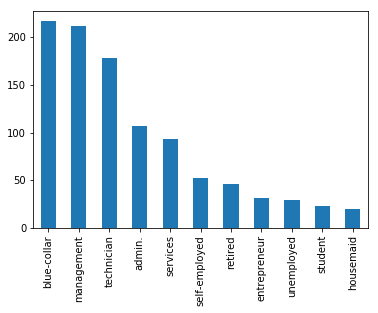

In [32]:
df['job'].value_counts().plot(kind='bar')

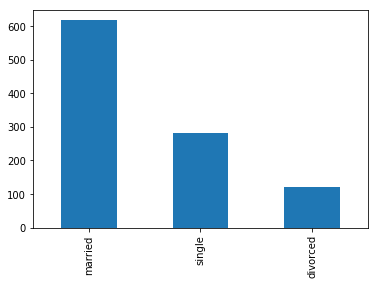

In [35]:
df['marital status'].value_counts().plot(kind='bar')

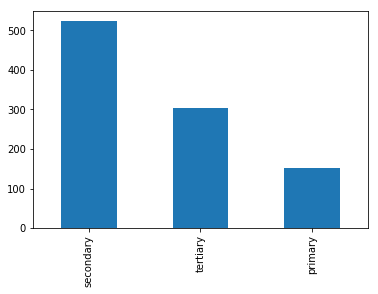

In [36]:
df['education'].value_counts().plot(kind='bar')

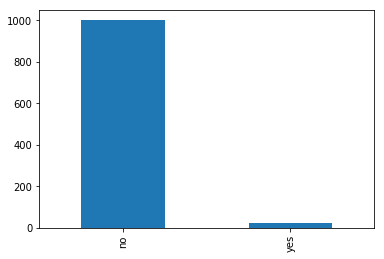

In [37]:
df['credit default'].value_counts().plot(kind='bar')

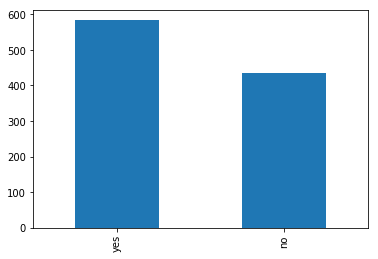

In [38]:
df['housing loan'].value_counts().plot(kind='bar')

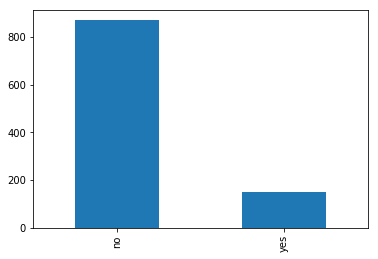

In [39]:
df['personal loan'].value_counts().plot(kind='bar')

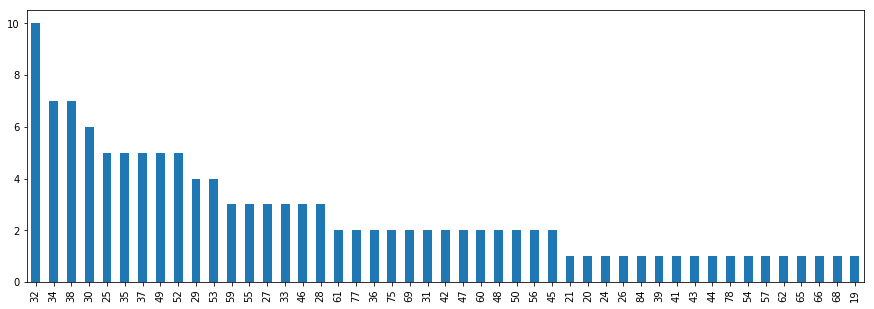

In [40]:
df[df['y']=='yes']['age'].value_counts().plot(kind='bar',figsize=(15,5))

In [41]:
df.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [51]:

lbl_encoder = preprocessing.LabelEncoder()


non_num_cols = [col for col in df.columns if df[col].dtypes != np.int64]


for col in non_num_cols:
    sanitized_data[col] = lbl_encoder.fit_transform(sanitized_data[col])

sanitized_data.head(15)

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,30,10,1,0,0,0,0,0
1,33,7,1,1,0,1,1,0
2,35,4,2,2,0,1,0,0
3,30,4,1,2,0,1,1,0
4,59,1,1,1,0,1,0,0
5,35,4,2,2,0,0,0,0
6,36,6,1,2,0,1,0,0
7,39,9,1,1,0,1,0,0
8,41,2,1,2,0,1,0,0
9,43,7,1,0,0,1,1,0


In [118]:
sanitized_data.age = sanitized_data.age.astype(np.int32)
sanitized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int32
job               1021 non-null int32
marital status    1021 non-null int32
education         1021 non-null int32
credit default    1021 non-null int32
housing loan      1021 non-null int32
personal loan     1021 non-null int32
y                 1021 non-null int32
dtypes: int32(8)
memory usage: 32.0 KB


<a name="trainModel"></a>

## Select Training data, test data

training set—a subset to train a model.

test set—a subset to test the trained model.

Preparing train and test data

In [100]:
X = sanitized_data.drop(columns=['y'])
y = sanitized_data['y']

print("Predictors: {0}".format(X.columns.values))


Predictors: ['age' 'job' 'marital status' 'education' 'credit default' 'housing loan'
 'personal loan']


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

print("Shape of Trainingset {0}".format(X_train.shape))
print("Shape of Testset {0}".format(X_test.shape))

Shape of Trainingset (816, 7)
Shape of Testset (205, 7)



<a name="testModel"></a>

## Test the model (Predictions and reporting)

In [121]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
print("Decision Tree model default parameters:\n")
print(model.get_params())

Decision Tree model default parameters:

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


Test the model ( Predicting data )

In [122]:
predictions = model.predict([[30,10,0,1,1,1,1]])
predictions

array([0])

In [123]:
dt_pred = model.predict(X_test)
print("Accuracy of Decision Tree Classifier : {0}".format(accuracy_score(y_test, dt_pred)))

Accuracy of Decision Tree Classifier : 0.8292682926829268


Update the training set and recheck the prediction

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

print("Shape of Trainingset {0}".format(X_train.shape))
print("Shape of Testset {0}".format(X_test.shape))

Shape of Trainingset (714, 7)
Shape of Testset (307, 7)


In [125]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
print("Decision Tree model default parameters:\n")
print(model.get_params())

Decision Tree model default parameters:

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [126]:
dt_pred = model.predict(X_test)
print("Accuracy of Decision Tree Classifier : {0}".format(accuracy_score(y_test, dt_pred)))

Accuracy of Decision Tree Classifier : 0.8338762214983714


<a name="evaluateModel"></a>

## Evaluate the model performance

In [127]:
print("Confusion Matrix of Decision Tree: \n{0}".format(confusion_matrix(dt_pred,y_test)))

Confusion Matrix of Decision Tree: 
[[252  26]
 [ 25   4]]


In [128]:
print("Classification report of Decision Tree: \n{0}".format(classification_report(dt_pred,y_test)))

Classification report of Decision Tree: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       278
           1       0.13      0.14      0.14        29

   micro avg       0.83      0.83      0.83       307
   macro avg       0.52      0.52      0.52       307
weighted avg       0.84      0.83      0.84       307



<a name="improveModel"></a>

## Suggest ways of improving the model

Refitting the model with best/optimized parameters

Decision Tree Classifier

In [129]:
dtree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, splitter='best')

dtree_model.fit(X_train, y_train)

# Predicting the test data
dt_preds = dtree_model.predict(X_test)
print("Decision Tree accuracy score: {0}".format(accuracy_score(y_test, dt_preds)))

Decision Tree accuracy score: 0.8990228013029316


Save the model we created onto disk

In [114]:
joblib.dump(model,'bank_data.joblib')

['bank_data.joblib']

Export the model to DOT file

In [115]:
sanitized_data.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,30,10,1,0,0,0,0,0
1,33,7,1,1,0,1,1,0
2,35,4,2,2,0,1,0,0
3,30,4,1,2,0,1,1,0
4,59,1,1,1,0,1,0,0


## Conclusion

The bank term deposit data has been analysed, cleaned and prepared trainset and test for building a classification model. 

Decision Tree Classifier	

Accuracy score with default Parameter 83.3%	
Accuracy score after Optimization 89.9%

After optimization activity the best parameters are used to build a model. ( decision tree  classifier showed  significant improvements )

Also we can dump the model as DOT file ( using tree.export_graphviz call ) to disk and visalize the chart as below.


<img src="data.jpg.png" align="center"  />
